## Loading data

In [4]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv('/gdrive/My Drive/diabetic_data.csv')

In [7]:
print(df.ndim)
print(df.shape)

2
(101766, 50)


In [8]:
df.head(15)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,?,?,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,?,?,70,1,21,0,0,0,414,411,V45,7,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,?,?,73,0,12,0,0,0,428,492,250,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,?,?,68,2,28,0,0,0,398,427,38,8,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,?,InternalMedicine,33,3,18,0,0,0,434,198,486,8,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [9]:
from collections import Counter
print(Counter(df['readmitted']))

Counter({'NO': 54864, '>30': 35545, '<30': 11357})


In [10]:
df.isna().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [11]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

## Visualizing data

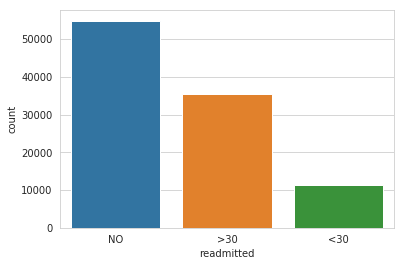

In [12]:
sns.set_style('whitegrid')
sns.countplot(x = 'readmitted',data = df)

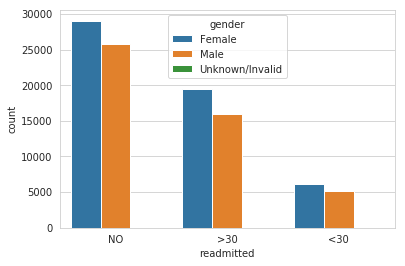

In [13]:
sns.set_style('whitegrid')
sns.countplot(x = 'readmitted',hue ='gender',data = df)

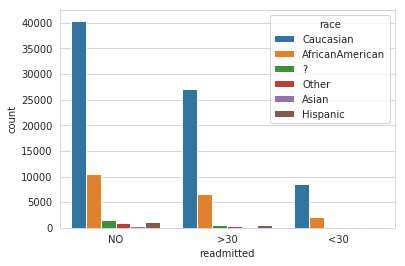

In [14]:
sns.set_style('whitegrid')
sns.countplot(x = 'readmitted',hue ='race',data = df)

In [15]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),?,?,Pediatrics-Endocrinology,250.83,?,?,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),?,?,?,276,250.01,255,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),?,?,?,648,250,V27,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),?,?,?,8,250.43,403,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),?,?,?,197,157,250,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Feature engineering

In [16]:
from collections import Counter
print(Counter(obj_df['race']))

Counter({'Caucasian': 76099, 'AfricanAmerican': 19210, '?': 2273, 'Hispanic': 2037, 'Other': 1506, 'Asian': 641})


In [0]:
obj_df['race'].replace({'?':'Caucasian'}, inplace=True)

In [19]:
from collections import Counter
print(Counter(obj_df['gender']))

Counter({'Female': 54708, 'Male': 47055, 'Unknown/Invalid': 3})


In [0]:
obj_df['gender'].replace({'Unknown/Invalid':'Female'}, inplace=True)

In [21]:
from collections import Counter
print(Counter(obj_df['age']))

Counter({'[70-80)': 26068, '[60-70)': 22483, '[50-60)': 17256, '[80-90)': 17197, '[40-50)': 9685, '[30-40)': 3775, '[90-100)': 2793, '[20-30)': 1657, '[10-20)': 691, '[0-10)': 161})


In [0]:
replace_nums = {"age": {'[70-80)': 75, '[60-70)': 65, '[50-60)': 55, '[80-90)': 85, '[40-50)': 45, '[30-40)': 35, '[90-100)': 105, '[20-30)': 25, '[10-20)': 15, '[0-10)': 5}}

In [23]:
obj_df.replace(replace_nums, inplace=True)
obj_df.head()

,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,5,?,?,Pediatrics-Endocrinology,250.83,?,?,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,15,?,?,?,276,250.01,255,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,25,?,?,?,648,250,V27,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,35,?,?,?,8,250.43,403,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,45,?,?,?,197,157,250,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


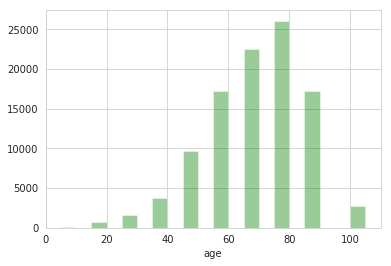

In [24]:
sns.distplot(obj_df['age'].dropna(),kde=False,bins=20,color='green')

In [25]:
df[df['weight'] == '?'].shape[0] * 1.0 / df.shape[0]

0.9685847925633315

In [26]:
print(Counter(obj_df['weight']))

Counter({'?': 98569, '[75-100)': 1336, '[50-75)': 897, '[100-125)': 625, '[125-150)': 145, '[25-50)': 97, '[0-25)': 48, '[150-175)': 35, '[175-200)': 11, '>200': 3})


In [0]:
obj_df.drop(['weight', 'payer_code'], axis=1, inplace=True)

In [28]:
from collections import Counter
print(Counter(obj_df['medical_specialty']))

Counter({'?': 49949, 'InternalMedicine': 14635, 'Emergency/Trauma': 7565, 'Family/GeneralPractice': 7440, 'Cardiology': 5352, 'Surgery-General': 3099, 'Nephrology': 1613, 'Orthopedics': 1400, 'Orthopedics-Reconstructive': 1233, 'Radiologist': 1140, 'Pulmonology': 871, 'Psychiatry': 854, 'Urology': 685, 'ObstetricsandGynecology': 671, 'Surgery-Cardiovascular/Thoracic': 652, 'Gastroenterology': 564, 'Surgery-Vascular': 533, 'Surgery-Neuro': 468, 'PhysicalMedicineandRehabilitation': 391, 'Oncology': 348, 'Pediatrics': 254, 'Hematology/Oncology': 207, 'Neurology': 203, 'Pediatrics-Endocrinology': 159, 'Otolaryngology': 125, 'Endocrinology': 120, 'Surgery-Thoracic': 109, 'Psychology': 101, 'Podiatry': 100, 'Surgery-Cardiovascular': 98, 'Pediatrics-CriticalCare': 87, 'Hematology': 82, 'Gynecology': 58, 'Hospitalist': 57, 'Radiology': 53, 'Surgeon': 45, 'Surgery-Plastic': 41, 'Osteopath': 39, 'Ophthalmology': 38, 'InfectiousDiseases': 37, 'SurgicalSpecialty': 33, 'Obsterics&Gynecology-Gynecol

In [0]:
obj_df.drop('medical_specialty',axis=1,inplace=True)

In [30]:
print(Counter(obj_df['diag_1']))
print(Counter(obj_df['diag_2']))
print(Counter(obj_df['diag_3']))

Counter({'428': 6862, '414': 6581, '786': 4016, '410': 3614, '486': 3508, '427': 2766, '491': 2275, '715': 2151, '682': 2042, '434': 2028, '780': 2019, '996': 1967, '276': 1889, '38': 1688, '250.8': 1680, '599': 1595, '584': 1520, 'V57': 1207, '250.6': 1183, '518': 1115, '820': 1082, '577': 1057, '493': 1056, '435': 1016, '562': 989, '574': 965, '296': 896, '560': 876, '250.7': 871, '250.13': 851, '440': 840, '433': 789, '998': 784, '722': 771, '250.02': 675, '578': 663, '250.11': 625, '507': 610, '789': 561, '453': 546, '530': 531, '8': 515, '403': 513, '535': 450, '402': 449, '415': 449, '295': 447, '724': 440, '458': 426, '162': 425, '997': 424, '250.12': 417, '250.82': 412, '278': 379, '733': 367, '285': 365, '592': 350, '401': 346, '482': 339, '590': 335, '558': 335, '197': 320, '280': 319, '824': 316, '250.1': 313, '153': 311, '426': 288, '569': 286, '648': 285, '571': 277, '531': 276, '511': 270, '250.4': 267, '787': 267, '404': 262, '707': 257, '411': 254, '198': 242, '572': 23

In [31]:
print(Counter(obj_df['diag_1']=='?'))
print(Counter(obj_df['diag_2']=='?'))
print(Counter(obj_df['diag_3']=='?'))

Counter({False: 101745, True: 21})
Counter({False: 101408, True: 358})
Counter({False: 100343, True: 1423})


In [0]:
obj_df['diag_1'].replace({'?':'428'}, inplace=True)
obj_df['diag_2'].replace({'?':'276'}, inplace=True)
obj_df['diag_3'].replace({'?':'250'}, inplace=True)

### visualizing each column

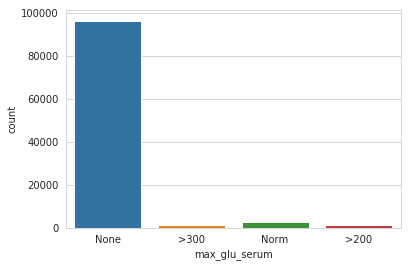

In [100]:
sns.countplot(x = 'max_glu_serum',data = obj_df)

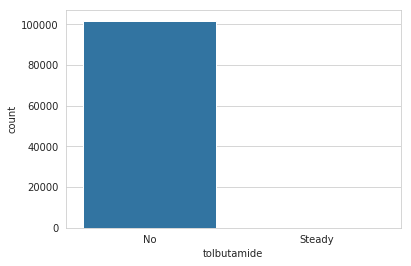

In [34]:
sns.countplot(x = 'tolbutamide',data = obj_df)

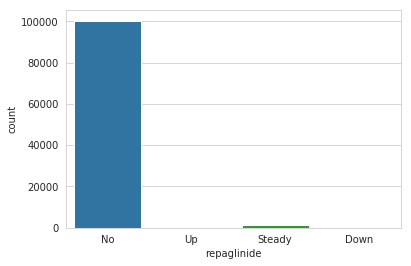

In [35]:
sns.countplot(x = 'repaglinide',data = obj_df)

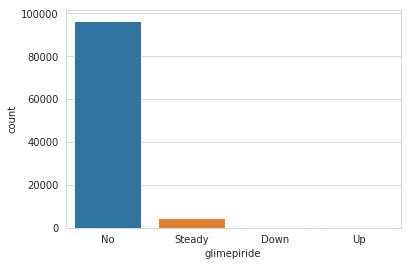

In [36]:
sns.countplot(x = 'glimepiride',data = obj_df)

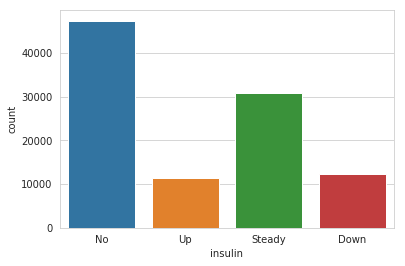

In [37]:
sns.countplot(x = 'insulin',data = obj_df)

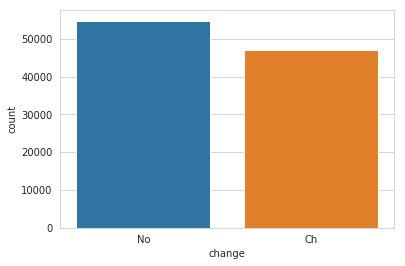

In [38]:
sns.countplot(x = 'change',data = obj_df)

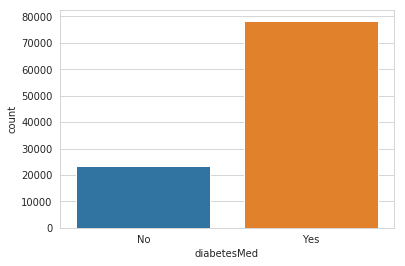

In [39]:
sns.countplot(x = 'diabetesMed',data = obj_df)

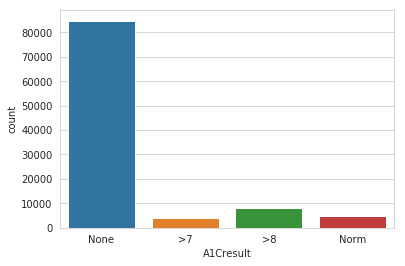

In [40]:
sns.countplot(x = 'A1Cresult',data = obj_df)

In [0]:
obj_df.drop(['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
           'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
           'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 
           'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
           'metformin-rosiglitazone', 'metformin-pioglitazone'], axis=1, inplace=True)

## Data preprocessing

In [42]:
obj_df.head()

,race,gender,age,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted
0,Caucasian,Female,5,250.83,276,250,None,None,No,No,No,NO
1,Caucasian,Female,15,276,250.01,255,None,None,Up,Ch,Yes,>30
2,AfricanAmerican,Female,25,648,250,V27,None,None,No,No,Yes,NO
3,Caucasian,Male,35,8,250.43,403,None,None,Up,Ch,Yes,NO
4,Caucasian,Male,45,197,157,250,None,None,Steady,Ch,Yes,NO


In [0]:
obj_df['readmitted'].replace({'>30':'YES','<30':'YES'}, inplace=True)

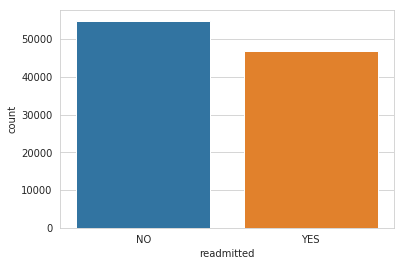

In [93]:
sns.countplot(x= 'readmitted',data = obj_df)

In [98]:
obj_df['readmitted'].value_counts(normalize=True)

NO     0.539119
YES    0.460881
Name: readmitted, dtype: float64

In [90]:
print(Counter(obj_df['readmitted']))

Counter({'NO': 54864, 'YES': 46902})


In [0]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [0]:
from sklearn.preprocessing import LabelEncoder

obj_df2 = MultiColumnLabelEncoder().fit_transform(obj_df.drop(['diag_1','diag_2','diag_3','age'],axis=1))

In [47]:
obj_df2.head()

,race,gender,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted
0,2,0,2,2,1,1,0,0
1,2,0,2,2,3,0,1,1
2,0,0,2,2,1,1,1,0
3,2,1,2,2,3,0,1,0
4,2,1,2,2,2,0,1,0


In [0]:
temp = obj_df[['age','diag_1','diag_2','diag_3']]

In [49]:
temp.head()

,age,diag_1,diag_2,diag_3
0,5,250.83,276,250
1,15,276,250.01,255
2,25,648,250,V27
3,35,8,250.43,403
4,45,197,157,250


In [0]:
result = pd.concat([temp, obj_df2], axis=1, sort=False)

In [51]:
result.head()

,age,diag_1,diag_2,diag_3,race,gender,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted
0,5,250.83,276,250,2,0,2,2,1,1,0,0
1,15,276,250.01,255,2,0,2,2,3,0,1,1
2,25,648,250,V27,0,0,2,2,1,1,1,0
3,35,8,250.43,403,2,1,2,2,3,0,1,0
4,45,197,157,250,2,1,2,2,2,0,1,0


In [0]:
temp2 = df[['admission_type_id'
,'discharge_disposition_id'
,'admission_source_id'
,'time_in_hospital'
,'num_lab_procedures'
,'num_procedures'
,'num_medications'
,'number_outpatient'
,'number_emergency'
,'number_inpatient'
,'number_diagnoses']]

In [53]:
print(Counter(df['discharge_disposition_id']))
print(Counter(df['admission_source_id']))
print(Counter(df['admission_type_id']))


Counter({1: 60234, 3: 13954, 6: 12902, 18: 3691, 2: 2128, 22: 1993, 11: 1642, 5: 1184, 25: 989, 4: 815, 7: 623, 23: 412, 13: 399, 14: 372, 28: 139, 8: 108, 15: 63, 24: 48, 9: 21, 17: 14, 16: 11, 19: 8, 10: 6, 27: 5, 12: 3, 20: 2})
Counter({7: 57494, 1: 29565, 17: 6781, 4: 3187, 6: 2264, 2: 1104, 5: 855, 3: 187, 20: 161, 9: 125, 8: 16, 22: 12, 10: 8, 14: 2, 11: 2, 25: 2, 13: 1})
Counter({1: 53990, 3: 18869, 2: 18480, 6: 5291, 5: 4785, 8: 320, 7: 21, 4: 10})


In [54]:
temp2['discharge_disposition_id'] = pd.Series(['Home' if val == 1 else 'Other discharge' 
                                              for val in temp2['discharge_disposition_id']], index=temp2.index)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [55]:
temp2['admission_source_id'] = pd.Series(['Emergency Room' if val == 7 else 'Referral' if val == 1 else 'Other source' 
                                              for val in temp2['admission_source_id']], index=temp2.index)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [56]:
temp2['admission_type_id'] = pd.Series(['Emergency' if val == 1 else 'Other type' 
                                              for val in temp2['admission_type_id']], index=temp2.index)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [57]:
temp2.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,Other type,Other discharge,Referral,1,41,0,1,0,0,0,1
1,Emergency,Home,Emergency Room,3,59,0,18,0,0,0,9
2,Emergency,Home,Emergency Room,2,11,5,13,2,0,1,6
3,Emergency,Home,Emergency Room,2,44,1,16,0,0,0,7
4,Emergency,Home,Emergency Room,1,51,0,8,0,0,0,5


In [58]:
temp2['admission_type_id'].replace({'Emergency':'0','Other type':'1'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [59]:
temp2['discharge_disposition_id'].replace({'Home':'0','Other discharge':'1'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [60]:
temp2['admission_source_id'].replace({'Emergency Room':'0','Referral':'1','Other source':'2'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [0]:
final_df = pd.concat([temp2,result],axis=1, sort=False)

In [62]:
print(final_df.shape)

(101766, 23)


## Feature selection

In [63]:
final_df.head(10)

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,age,diag_1,diag_2,diag_3,race,gender,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted
0,1,1,1,1,41,0,1,0,0,0,1,5,250.83,276,250,2,0,2,2,1,1,0,0
1,0,0,0,3,59,0,18,0,0,0,9,15,276,250.01,255,2,0,2,2,3,0,1,1
2,0,0,0,2,11,5,13,2,0,1,6,25,648,250,V27,0,0,2,2,1,1,1,0
3,0,0,0,2,44,1,16,0,0,0,7,35,8,250.43,403,2,1,2,2,3,0,1,0
4,0,0,0,1,51,0,8,0,0,0,5,45,197,157,250,2,1,2,2,2,0,1,0
5,1,0,2,3,31,6,16,0,0,0,9,55,414,411,250,2,1,2,2,2,1,1,1
6,1,0,2,4,70,1,21,0,0,0,7,65,414,411,V45,2,1,2,2,2,0,1,0
7,0,0,0,5,73,0,12,0,0,0,8,75,428,492,250,2,1,2,2,1,1,1,1
8,1,0,2,13,68,2,28,0,0,0,8,85,398,427,38,2,0,2,2,2,0,1,0
9,1,1,2,12,33,3,18,0,0,0,8,105,434,198,486,2,0,2,2,2,0,1,0


In [64]:
print(final_df.shape)

(101766, 23)


In [0]:
X = final_df.iloc[ :,0:22]
Y = final_df.iloc[ :,-1]

In [0]:
del X['diag_3']

In [67]:
print(X.shape)
print(Y.shape)

(101766, 21)
(101766,)


In [0]:


from sklearn.model_selection import train_test_split
X_demo, X_test, y_demo, y_test = train_test_split(X, Y, test_size=0.20)

In [77]:
# fit Random Forest model for feature selection
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_demo, y_demo)
importances = forest.feature_importances_

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [78]:
# make importance relative to the max importance
feature_importance = 100.0 * (importances / importances.max())
sorted_idx = np.argsort(feature_importance)
feature_names = list(X_demo.columns.values)
feature_names_sort = [feature_names[indice] for indice in sorted_idx]
pos = np.arange(sorted_idx.shape[0]) + .5
print ('Top 6 features are: ')
for feature in feature_names_sort[::-1][:6]:
    print (feature)

Top 6 features are: 
num_lab_procedures
num_medications
time_in_hospital
age
number_diagnoses
num_procedures


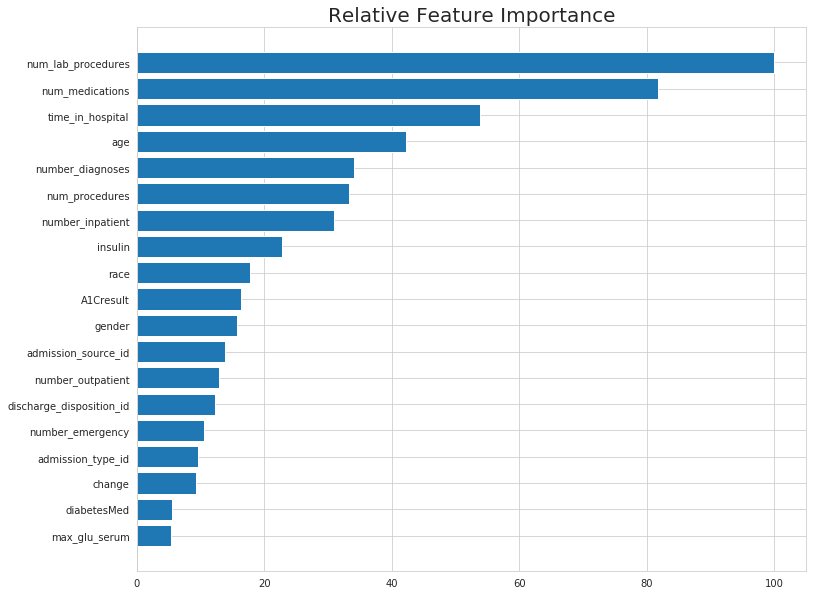

In [79]:
plt.figure(figsize=(12, 10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names_sort)
plt.title('Relative Feature Importance', fontsize=20)
plt.show()

In [0]:
X_train = X_demo[['num_lab_procedures',
'num_medications',
'time_in_hospital',
'age',
'num_procedures',
'number_diagnoses']]

In [0]:
X_test = X_test[['num_lab_procedures',
'num_medications',
'time_in_hospital',
'age',
'num_procedures',
'number_diagnoses']]

## Model selection

### Random forest

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


clf1 = RandomForestClassifier()
RF_score = cross_val_score(clf1, X_train, y_demo, cv=10, scoring='accuracy').mean()
RF_score

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

0.5378320044320579

In [83]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=500)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_demo)

# prediction on test set
y_pred=clf.predict(X_test)


from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5382234450230913


In [84]:
#ConfusionMatrix
print(metrics.confusion_matrix(y_test , y_pred))

[[6671 4329]
 [5070 4284]]


### Logistic regeression

In [85]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model = model.fit(X_train,y_demo )
ms = model.score(X_train,y_demo)
print("model score::",ms)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


model score:: 0.5563061956468334


In [86]:
predicted = model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, predicted))

print(metrics.confusion_matrix(y_test , predicted))

Accuracy: 0.5517834332317972
[[7444 3556]
 [5567 3787]]
